Chapter 13
# 鸢尾花样本数据到图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# 加载鸢尾花数据集
iris = load_iris()
data = iris.data[:, :2]  

In [3]:
# 计算欧氏距离矩阵
D = euclidean_distances(data)
# 用成对距离矩阵可以构造无向图

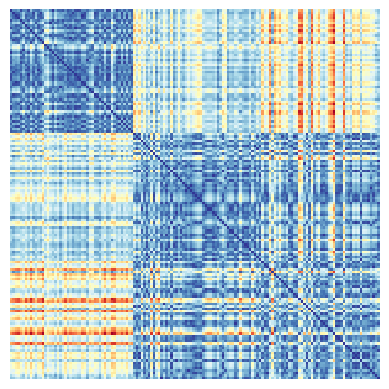

In [15]:
# 绘制成对欧氏距离热图
sns.heatmap(D, square = True, cbar = False,
            xticklabels=[], yticklabels=[],
            cmap = 'RdYlBu_r')

plt.savefig('成对欧氏距离热图.svg')

In [5]:
# 创建无向图
G = nx.Graph(D, nodetype=int)

# 提取边的权重，即欧氏距离值
edge_weights = [G[i][j]['weight'] for i, j in G.edges]

In [6]:
# 使用鸢尾花数据的真实位置绘制图形
pos = {i: (data[i, 0], data[i, 1]) for i in range(len(data))}

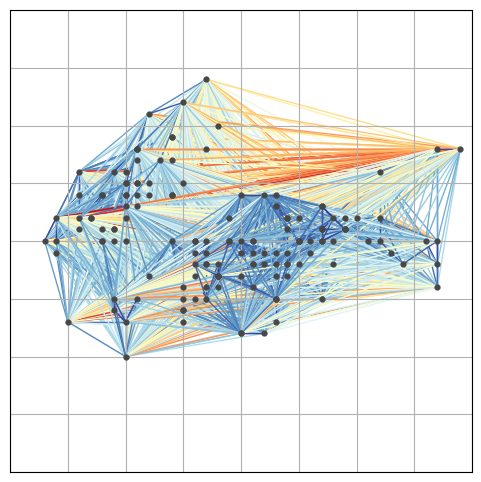

In [7]:
# 绘制无向图，所有边

fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, 
                 pos, 
                 node_color = '0.28',
                 edge_color = edge_weights,
                 edge_cmap = plt.cm.RdYlBu_r,
                 linewidths = 0.2,
                 with_labels=False, 
                 node_size = 18)

ax.set_xlim(4,8)
ax.set_ylim(1,5)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('鸢尾花_欧氏距离矩阵_无向图, 真实位置.svg')

## 绘制部分边

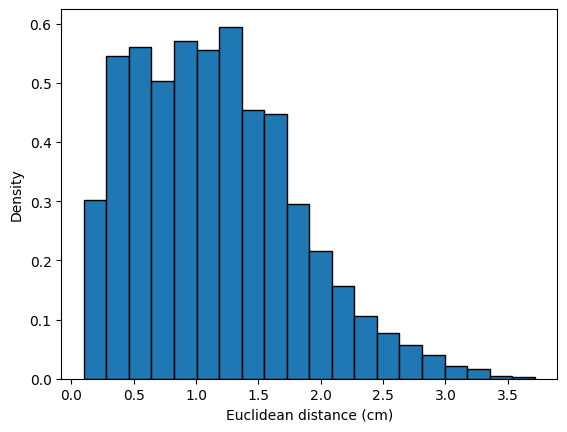

In [14]:
# 欧氏距离的直方图

plt.hist(edge_weights, bins = 20, ec = 'k', density = True)
plt.xlabel('Euclidean distance (cm)')
plt.ylabel('Density')

plt.savefig('欧氏距离直方图.svg')

In [12]:
len(edge_weights)
# 150 * 149/2

11135

In [9]:
# 选择需要保留的边

edge_kept = [(u, v) 
             for (u, v, d) 
             in G.edges(data=True) 
             if d["weight"] <= 0.5]

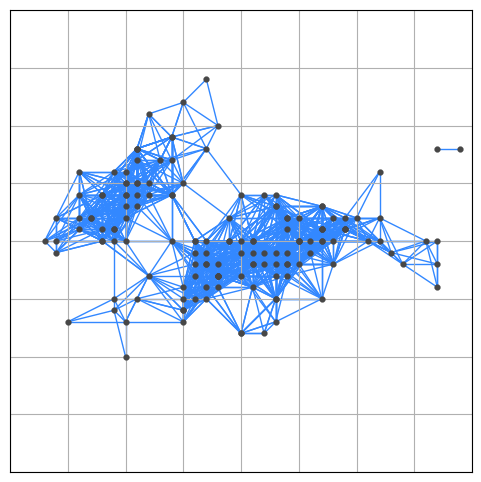

In [10]:
# 绘制无向图，剔除欧氏距离大于0.5的边

fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, 
                 pos, 
                 edgelist = edge_kept,
                 node_color = '0.28',
                 edge_color = '#3388FF',
                 linewidths = 0.2,
                 with_labels=False, 
                 node_size = 18)

ax.set_xlim(4,8)
ax.set_ylim(1,5)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('鸢尾花_欧氏距离矩阵_无向图，保留部分边.svg')